<a href="https://colab.research.google.com/github/Wilson77Calixto/Aprender-praticando-Python/blob/master/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEB SCRAPING
PESQUISA DE BANCO DADOS MAIS UTILIZADOS E COTAÇÃO DO DÓLAR EM 2008

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import json

In [10]:
html=requests.get("https://db-engines.com/en/ranking").content
soup=BeautifulSoup(html,'html5lib')

In [ ]:
tabela=soup.find('table',{'class':'dbi'}).find('tbody')
tabela

In [15]:
linhas=tabela.find_all('tr')
contalinhas=0
banco=[]
pontos=[]
for linha in linhas:
    contalinhas+=1
    if contalinhas>3:
        dado=linha.find_all('td')
        dado2=linha.find('a')
        pontos.append(float(dado[3].text))
        #ao pegar o dado do link, veja que ele monta um array com as informações, onde a primeira (0) é o nome do banco
        banco.append(dado2.contents[0])

In [21]:
dados = pd.DataFrame(banco, columns=['Banco'])
dados['Pontos']=pontos



In [19]:
dados

,Banco,Pontos
0,Oracle,1280.30
1,MySQL,1194.87
2,Microsoft SQL Server,942.13
3,PostgreSQL,615.87
4,MongoDB,472.98
...,...,...
390,Upscaledb,0.00
391,WhiteDB,0.00
392,XTDB,0.00
393,Yaacomo,0.00


In [18]:
dados.head()

,Banco,Pontos
0,Oracle,1280.30
1,MySQL,1194.87
2,Microsoft SQL Server,942.13
3,PostgreSQL,615.87
4,MongoDB,472.98


GEREÇÃO DE GRÁFICO DE COLUNAS

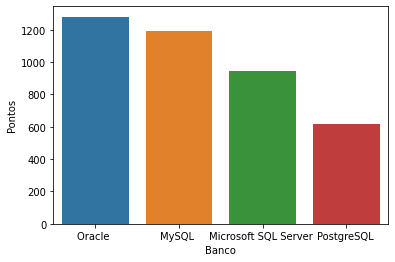

In [26]:
sns.barplot(data=dados.head(4), x='Banco', y='Pontos')

NOVO DATAFRAME

In [27]:
dados_ex4=dados.head(10)

In [28]:
dados_ex4.head(10)

,Banco,Pontos
0,Oracle,1280.30
1,MySQL,1194.87
2,Microsoft SQL Server,942.13
3,PostgreSQL,615.87
4,MongoDB,472.98
5,Redis,173.62
6,IBM Db2,161.22
7,Elasticsearch,154.33
8,Microsoft Access,145.09
9,SQLite,136.68


In [ ]:
total=dados_ex4['Pontos'].sum()
dados_ex4['Share']=dados_ex4['Pontos']/total*100
dados_ex4

In [32]:
total


5277.09

MATPLOTLIB PARA GERAR GRÁFICO BASEADO EM SHARE

<function matplotlib.pyplot.show>

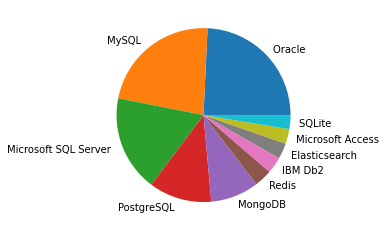

In [37]:
plt.pie(dados_ex4['Share'],labels=dados_ex4['Banco'])
plt.show



PORCENTAGEM DE RELEVÂNCIA DE CADA BD EM RELAÇÃO AOS DEMAIS

In [38]:
total=dados['Pontos'].sum()
dados['Share']=dados['Pontos']/total*100
dados


,Banco,Pontos,Share
0,Oracle,1280.30,17.363791
1,MySQL,1194.87,16.205165
2,Microsoft SQL Server,942.13,12.777433
3,PostgreSQL,615.87,8.352603
4,MongoDB,472.98,6.414688
...,...,...,...
390,Upscaledb,0.00,0.000000
391,WhiteDB,0.00,0.000000
392,XTDB,0.00,0.000000
393,Yaacomo,0.00,0.000000


In [39]:
dados.to_csv("db-ranking.csv")

CONSULTA DA COTAÇÃO DO DÓLAR EM 2008

In [41]:
site="https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarDia(dataCotacao=@dataCotacao)?@dataCotacao='09-16-2008'&$top=100&$format=json&$select=cotacaoCompra,cotacaoVenda,dataHoraCotacao"
resposta=requests.get(site)
dados=json.loads(resposta.text)

In [42]:
dados

{'@odata.context': 'https://was-p.bcnet.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata$metadata#_CotacaoDolarDia(cotacaoCompra,cotacaoVenda,dataHoraCotacao)',
 'value': [{'cotacaoCompra': 1.8402,
   'cotacaoVenda': 1.841,
   'dataHoraCotacao': '2008-09-16 17:36:00.0'}]}

In [43]:
print(dados['value'][0]['cotacaoVenda'])

1.841
